# Ph·∫ßn n√†y ph√¢n t√≠ch c∆° s·ªü d·ªØ li·ªáu th·ª±c ph·∫©m c·ªßa B·ªô N√¥ng nghi·ªáp Hoa K·ª≥ (USDA), ch·ª©a th√¥ng tin dinh d∆∞·ª°ng c·ªßa h√†ng ngh√¨n lo·∫°i th·ª±c ph·∫©m.

## 1.ƒê·ªãnh nghƒ©a v·∫•n ƒë·ªÅ

Trong b·ªëi c·∫£nh nhu c·∫ßu ph√¢n t√≠ch v√† qu·∫£n l√Ω dinh d∆∞·ª°ng ng√†y c√†ng quan tr·ªçng, vi·ªác hi·ªÉu r√µ h√†m l∆∞·ª£ng v√† m·ªëi quan h·ªá gi·ªØa c√°c ch·∫•t dinh d∆∞·ª°ng trong th·ª±c ph·∫©m l√† c·∫ßn thi·∫øt.
B√†i to√°n nh·∫±m ph√¢n t√≠ch d·ªØ li·ªáu th·ª±c ph·∫©m t·ª´ USDA, qua ƒë√≥ kh√°m ph√°:

* S·ª± kh√°c bi·ªát v·ªÅ gi√° tr·ªã dinh d∆∞·ª°ng gi·ªØa c√°c nh√≥m th·ª±c ph·∫©m;

* M·ªëi t∆∞∆°ng quan gi·ªØa c√°c ch·∫•t nh∆∞ Energy, Protein, Fat, Water;

* C∆° s·ªü cho vi·ªác ƒë√°nh gi√° v√† so s√°nh th√†nh ph·∫ßn dinh d∆∞·ª°ng c·ªßa th·ª±c ph·∫©m.

## 2. C√°c b∆∞·ªõc th·ª±c hi·ªán 

### N·∫°p d·ªØ li·ªáu JSON


In [48]:
import json 
db = json.load(open("database.json")) 
len(db)


6636

In [ ]:
# Xem c·∫•u tr√∫c 1 ph·∫ßn t·ª≠ trong file
db[0].keys() 


dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [ ]:
# Xem th√¥ng tin dinh d∆∞·ª°ng c·ªßa ph·∫ßn t·ª≠ ƒë·∫ßu ti√™n
db[0]["nutrients"][0] 

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

### T·∫°o b·∫£ng dinh d∆∞·ª°ng (nutrients)

In [51]:
import pandas as pd
nutrients = pd.DataFrame(db[0]["nutrients"]) 
nutrients.head(7) 


value units                  description        group
0    25.18     g                      Protein  Composition
1    29.20     g            Total lipid (fat)  Composition
2     3.06     g  Carbohydrate, by difference  Composition
3     3.28     g                          Ash        Other
4   376.00  kcal                       Energy       Energy
5    39.28     g                        Water  Composition
6  1573.00    kJ                       Energy       Energy

### L·∫•y th√¥ng tin chung c·ªßa th·ª±c ph·∫©m


In [52]:
info_keys = ["description", "group", "id", "manufacturer"] 
info = pd.DataFrame(db, columns=info_keys) 
info.head() 

description                   group    id  \
0                     Cheese, caraway  Dairy and Egg Products  1008   
1                     Cheese, cheddar  Dairy and Egg Products  1009   
2                        Cheese, edam  Dairy and Egg Products  1018   
3                        Cheese, feta  Dairy and Egg Products  1019   
4  Cheese, mozzarella, part skim milk  Dairy and Egg Products  1028   

  manufacturer  
0               
1               
2               
3               
4

In [ ]:
# Ki·ªÉm tra th√¥ng tin c·ªßa DataFrame
info.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [ ]:
# Th·ªëng k√™ nh√≥m th·ª±c ph·∫©m
pd.value_counts(info["group"])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29100\2082787924.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(info["group"])


group
Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and

### G·ªôp d·ªØ li·ªáu dinh d∆∞·ª°ng c·ªßa t·∫•t c·∫£ m√≥n ƒÉn

In [55]:
nutrients = [] 
for rec in db: 
 fnuts = pd.DataFrame(rec["nutrients"]) 
 fnuts["id"] = rec["id"] 
 nutrients.append(fnuts) 
nutrients = pd.concat(nutrients, ignore_index=True) 

In [ ]:
# Ki·ªÉm tra d·ªØ li·ªáu b·∫£ng nutrients
nutrients 

value units                         description        group     id
0        25.180     g                             Protein  Composition   1008
1        29.200     g                   Total lipid (fat)  Composition   1008
2         3.060     g         Carbohydrate, by difference  Composition   1008
3         3.280     g                                 Ash        Other   1008
4       376.000  kcal                              Energy       Energy   1008
...         ...   ...                                 ...          ...    ...
389350    0.000   mcg                 Vitamin B-12, added     Vitamins  43546
389351    0.000    mg                         Cholesterol        Other  43546
389352    0.072     g        Fatty acids, total saturated        Other  43546
389353    0.028     g  Fatty acids, total monounsaturated        Other  43546
389354    0.041     g  Fatty acids, total polyunsaturated        Other  43546

[389355 rows x 5 columns]

### X·ª≠ l√Ω d·ªØ li·ªáu

In [ ]:
# ƒê·∫øm s·ªë d√≤ng d·ªØ li·ªáu b·ªã tr√πng
nutrients.duplicated().sum()

14179

In [ ]:
# X√≥a c√°c d√≤ng d·ªØ li·ªáu tr√πng l·∫∑p
nutrients = nutrients.drop_duplicates() 

### ƒê·ªïi t√™n c·ªôt c·ªßa b·∫£ng nh√≥m th·ª±c ph·∫©m ƒë·ªÉ tr√°nh tr√πng l·∫∑p khi g·ªôp d·ªØ li·ªáu

In [59]:
col_mapping = {"description" : "food", "group" : "fgroup"} 
info = info.rename(columns=col_mapping, copy=False) 
info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


### ƒê·ªïi t√™n c·ªôt c·ªßa b·∫£ng dinh d∆∞·ª°ng cho r√µ r√†ng h∆°n

In [60]:
col_mapping = {"description" : "nutrient", "group" : "nutgroup"} 
nutrients = nutrients.rename(columns=col_mapping, copy=False) 
nutrients 

value units                            nutrient     nutgroup     id
0        25.180     g                             Protein  Composition   1008
1        29.200     g                   Total lipid (fat)  Composition   1008
2         3.060     g         Carbohydrate, by difference  Composition   1008
3         3.280     g                                 Ash        Other   1008
4       376.000  kcal                              Energy       Energy   1008
...         ...   ...                                 ...          ...    ...
389350    0.000   mcg                 Vitamin B-12, added     Vitamins  43546
389351    0.000    mg                         Cholesterol        Other  43546
389352    0.072     g        Fatty acids, total saturated        Other  43546
389353    0.028     g  Fatty acids, total monounsaturated        Other  43546
389354    0.041     g  Fatty acids, total polyunsaturated        Other  43546

[375176 rows x 5 columns]

### G·ªôp hai b·∫£ng nh√≥m th·ª±c ph·∫©m v√† dinh d∆∞·ª°ng l·∫°i v·ªõi nhau theo c·ªôt id

In [61]:
ndata = pd.merge(nutrients, info, on="id") 
ndata.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 22.9+ MB


In [62]:
#Xem chi ti·∫øt th√¥ng tin c·ªßa m·ªôt d√≤ng c·ª• th·ªÉ trong b·∫£ng ndata
ndata.iloc[30000]

value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

## 3.Ph√¢n t√≠ch kh√°m ph√° d·ªØ li·ªáu

#### T√≠nh trung v·ªã (median) c·ªßa m·ªói ch·∫•t dinh d∆∞·ª°ng theo nh√≥m th·ª±c ph·∫©m v√† v·∫Ω bi·ªÉu ƒë·ªì cho ‚ÄúZinc, Zn‚Äù

<Axes: ylabel='fgroup'>

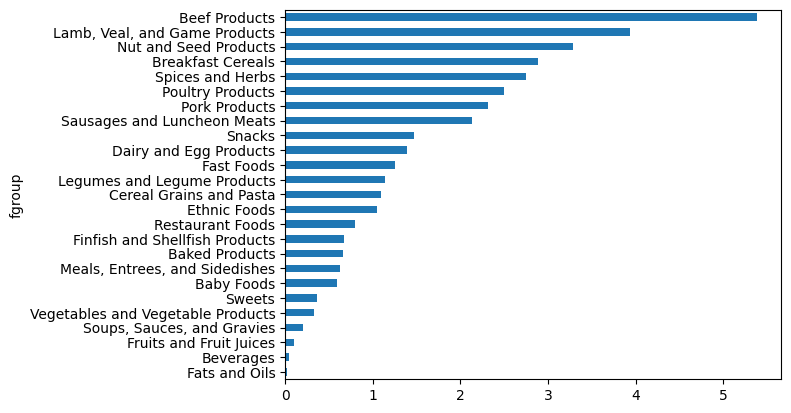

In [63]:
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5) 
result["Zinc, Zn"].sort_values().plot(kind="barh") 


#### T√¨m th·ª±c ph·∫©m c√≥ h√†m l∆∞·ª£ng cao nh·∫•t cho t·ª´ng ch·∫•t dinh d∆∞·ª°ng v√† r√∫t g·ªçn t√™n th·ª±c ph·∫©m

In [64]:
by_nutrient = ndata.groupby(["nutgroup", "nutrient"]) 
def get_maximum(x): 
 return x.loc[x.value.idxmax()] 
max_foods = by_nutrient.apply(get_maximum)[["value", "food"]] 
# make the food a little smaller 
max_foods["food"] = max_foods["food"].str[:50] 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29100\3456134986.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]


In [ ]:
# Xem danh s√°ch th·ª±c ph·∫©m c√≥ h√†m l∆∞·ª£ng cao nh·∫•t trong nh√≥m ‚ÄúAmino Acids‚Äù
max_foods.loc["Amino Acids"]["food"] 

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 

### 3.1 Ph√¢n t√≠ch m√¥ t·∫£

#### Trung b√¨nh nƒÉng l∆∞·ª£ng (kcal) c·ªßa t·ª´ng nh√≥m th·ª±c ph·∫©m l√† bao nhi√™u?

In [66]:
# L·ªçc c√°c d√≤ng c√≥ ch·∫•t dinh d∆∞·ª°ng l√† "Energy"
# Sau ƒë√≥ nh√≥m theo 'fgroup' (nh√≥m th·ª±c ph·∫©m)
# V√† t√≠nh gi√° tr·ªã trung b√¨nh nƒÉng l∆∞·ª£ng (kcal) cho t·ª´ng nh√≥m
ndata[ndata['nutrient'] == "Energy"].groupby('fgroup')['value'].mean()


fgroup
Baby Foods                            426.389952
Baked Products                        931.931452
Beef Products                         559.323625
Beverages                             303.875899
Breakfast Cereals                     824.916873
Cereal Grains and Pasta               739.040984
Dairy and Egg Products                514.355140
Ethnic Foods                          541.821212
Fast Foods                            647.979452
Fats and Oils                        1460.969072
Finfish and Shellfish Products        350.549020
Fruits and Fruit Juices               222.745427
Lamb, Veal, and Game Products         552.879710
Legumes and Legume Products           529.441096
Meals, Entrees, and Sidedishes        404.964912
Nut and Seed Products                1270.308594
Pork Products                         557.013720
Poultry Products                      522.900862
Restaurant Foods                      598.333333
Sausages and Luncheon Meats           611.954955
Snacks       

Nh·∫≠n x√©t: 
* Fats and Oils (1460.97 kcal) l√† nh√≥m c√≥ nƒÉng l∆∞·ª£ng cao nh·∫•t ‚Äî ch·ªß y·∫øu do ch·ª©a nhi·ªÅu ch·∫•t b√©o.
* Nut and Seed Products (1270.31 kcal) v√† Snacks (1152.15 kcal) c≈©ng c√≥ nƒÉng l∆∞·ª£ng cao v√¨ m·∫≠t ƒë·ªô dinh d∆∞·ª°ng l·ªõn.
* Vegetables and Vegetable Products (162.05 kcal) c√≥ nƒÉng l∆∞·ª£ng th·∫•p nh·∫•t, ph√π h·ª£p v·ªõi ƒë·∫∑c ƒëi·ªÉm √≠t ch·∫•t b√©o v√† nhi·ªÅu n∆∞·ªõc.
* C√°c nh√≥m nh∆∞ Baked Products, Sweets, v√† Breakfast Cereals c√≥ m·ª©c nƒÉng l∆∞·ª£ng cao, ph·∫£n √°nh l∆∞·ª£ng ƒë∆∞·ªùng v√† tinh b·ªôt nhi·ªÅu.
* Fruits and Fruit Juices v√† Soups, Sauces, and Gravies l√† nh√≥m c√≥ nƒÉng l∆∞·ª£ng th·∫•p, th∆∞·ªùng d√πng l√†m m√≥n ph·ª• ho·∫∑c b·ªï sung.

#### Lo·∫°i th·ª±c ph·∫©m n√†o ch·ª©a protein cao nh·∫•t trong nh√≥m ‚ÄúDairy and Egg Products‚Äù?

In [67]:
# L·ªçc c√°c th·ª±c ph·∫©m thu·ªôc nh√≥m "Dairy and Egg Products"
# V√† c√≥ ch·∫•t dinh d∆∞·ª°ng l√† "Protein"
# S·∫Øp x·∫øp gi·∫£m d·∫ßn theo h√†m l∆∞·ª£ng protein
# L·∫•y ra 10 lo·∫°i th·ª±c ph·∫©m c√≥ h√†m l∆∞·ª£ng protein cao nh·∫•t trong nh√≥m n√†y
ndata[(ndata['fgroup'] == "Dairy and Egg Products") & (ndata['nutrient'] == "Protein")] \
    .sort_values('value', ascending=False) \
    .head(10)


value units nutrient     nutgroup     id  \
278540  41.60     g  Protein  Composition  43340   
3464    40.00     g  Protein  Composition   1185   
1845    36.16     g  Protein  Composition   1091   
277266  35.80     g  Protein  Composition  43260   
1990    35.50     g  Protein  Composition   1093   
1919    35.10     g  Protein  Composition   1092   
2045    34.30     g  Protein  Composition   1094   
422     31.80     g  Protein  Composition   1038   
274457  31.70     g  Protein  Composition  42304   
281677  28.40     g  Protein  Composition  43589   

                                                     food  \
278540                       Cheese, parmesan, low sodium   
3464                    Parmesan cheese topping, fat free   
1845    Milk, dry, nonfat, regular, without added vita...   
277266  Beverage, instant breakfast powder, chocolate,...   
1990                   Milk, dry, nonfat, calcium reduced   
1919    Milk, dry, nonfat, instant, with added vitamin...   
2045                              Milk, buttermilk, dried   
422                                        Cheese, romano   
274457                         Cheese, mozzarella, nonfat   
281677                             Cheese, swiss, low fat   

                        fgroup manufacturer  
278540  Dairy and Egg Products         None  
3464    Dairy and Egg Products               
1845    Dairy and Egg Products               
277266  Dairy and Egg Products         None  
1990    Dairy and Egg Products               
1919    Dairy and Egg Products               
2045    Dairy and Egg Products               
422     Dairy and Egg Products               
274457  Dairy and Egg Products         None  
281677  Dairy and Egg Products         None

Nh·∫≠n x√©t:
* Ph√¥ mai Parmesan (√≠t natri) ƒë·ª©ng ƒë·∫ßu, ch·ª©a h√†m l∆∞·ª£ng protein r·∫•t cao, g·∫•p ~2 l·∫ßn so v·ªõi s·ªØa b·ªôt t√°ch b√©o.
* C√°c lo·∫°i ph√¥ mai v√† s·ªØa b·ªôt n√≥i chung ƒë·ªÅu c√≥ h√†m l∆∞·ª£ng protein cao do c√¥ ƒë·∫∑c h√†m l∆∞·ª£ng dinh d∆∞·ª°ng sau qu√° tr√¨nh t√°ch n∆∞·ªõc.
* So v·ªõi c√°c s·∫£n ph·∫©m t·ª´ s·ªØa t∆∞∆°i ho·∫∑c ƒë·ªì u·ªëng, nh√≥m ph√¥ mai v√† s·ªØa kh√¥ lu√¥n cung c·∫•p ngu·ªìn protein ƒë·∫≠m ƒë·∫∑c nh·∫•t.

#### Nh√≥m n√†o c√≥ ƒë·ªô ƒëa d·∫°ng dinh d∆∞·ª°ng cao nh·∫•t (nhi·ªÅu lo·∫°i ch·∫•t kh√°c nhau)?

In [68]:
# T√≠nh ƒë·ªô ƒëa d·∫°ng dinh d∆∞·ª°ng c·ªßa t·ª´ng nh√≥m th·ª±c ph·∫©m
# ‚Üí ƒê·∫øm s·ªë l∆∞·ª£ng ch·∫•t dinh d∆∞·ª°ng (nutrient) kh√°c nhau trong m·ªói nh√≥m (fgroup)
# Sau ƒë√≥ s·∫Øp x·∫øp gi·∫£m d·∫ßn ƒë·ªÉ xem nh√≥m n√†o c√≥ nhi·ªÅu lo·∫°i ch·∫•t dinh d∆∞·ª°ng nh·∫•t
diversity = ndata.groupby('fgroup')['nutrient'].nunique().sort_values(ascending=False)

# In ra k·∫øt qu·∫£
print(diversity)


fgroup
Vegetables and Vegetable Products    94
Sweets                               93
Dairy and Egg Products               93
Snacks                               92
Fats and Oils                        92
Nut and Seed Products                91
Fruits and Fruit Juices              91
Baked Products                       91
Legumes and Legume Products          91
Ethnic Foods                         90
Restaurant Foods                     90
Soups, Sauces, and Gravies           89
Sausages and Luncheon Meats          89
Poultry Products                     89
Baby Foods                           89
Finfish and Shellfish Products       89
Fast Foods                           89
Breakfast Cereals                    89
Beverages                            89
Meals, Entrees, and Sidedishes       88
Pork Products                        88
Cereal Grains and Pasta              88
Spices and Herbs                     88
Beef Products                        88
Lamb, Veal, and Game Products    

Nh·∫≠n x√©t:
* Rau c·ªß qu·∫£ (Vegetables and Vegetable Products) c√≥ ƒë·ªô ƒëa d·∫°ng dinh d∆∞·ª°ng cao nh·∫•t, ph·∫£n √°nh s·ª± phong ph√∫ t·ª± nhi√™n v·ªÅ vitamin, kho√°ng ch·∫•t, ch·∫•t x∆° v√† h·ª£p ch·∫•t vi l∆∞·ª£ng.
* C√°c nh√≥m s·ªØa, tr·ª©ng, h·∫°t, b√°nh ng·ªçt c≈©ng c√≥ nhi·ªÅu lo·∫°i ch·∫•t dinh d∆∞·ª°ng, do th∆∞·ªùng ƒë∆∞·ª£c ch·∫ø bi·∫øn ho·∫∑c b·ªï sung vi ch·∫•t.
* Nh·ªØng nh√≥m nh∆∞ th·ªãt ƒë·ªè (Lamb, Veal, Beef) c√≥ √≠t lo·∫°i ch·∫•t h∆°n (kho·∫£ng 86‚Äì88), ch·ªß y·∫øu t·∫≠p trung v√†o protein, ch·∫•t b√©o v√† kho√°ng.


### 3.2 Ph√¢n t√≠ch so s√°nh

#### So s√°nh h√†m l∆∞·ª£ng protein v√† lipid (ch·∫•t b√©o) gi·ªØa nh√≥m ‚ÄúMeat‚Äù v√† ‚ÄúDairy‚Äù?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# T·∫°o b·∫£ng pivot: m·ªói h√†ng l√† 1 th·ª±c ph·∫©m, m·ªói c·ªôt l√† 1 ch·∫•t dinh d∆∞·ª°ng
pivot = ndata.pivot_table(values='value', index='food', columns='nutrient', aggfunc='mean')

# G·∫Øn c·ªôt nh√≥m th·ª±c ph·∫©m (fgroup)
pivot = pivot.join(ndata[['food', 'fgroup']].drop_duplicates().set_index('food'))

pivot.head()


Adjusted Protein  Alanine  \
food                                                                            
AMARANTH FLAKES                                                  NaN      NaN   
APPLEBEE'S, 9 oz house sirloin steak                             NaN    1.522   
APPLEBEE'S, Double Crunch Shrimp                                 NaN    0.716   
APPLEBEE'S, French fries                                         NaN      NaN   
APPLEBEE'S, KRAFT, Macaroni & Cheese, from kid'...               NaN    0.224   

                                                    Alcohol, ethyl  Arginine  \
food                                                                           
AMARANTH FLAKES                                                0.0       NaN   
APPLEBEE'S, 9 oz house sirloin steak                           NaN     1.790   
APPLEBEE'S, Double Crunch Shrimp                               NaN     1.029   
APPLEBEE'S, French fries                                       NaN       NaN   
APPLEBEE'S, KRAFT, Macaroni & Cheese, from kid'...             NaN     0.245   

                                                     Ash  Aspartic acid  \
food                                                                      
AMARANTH FLAKES                                     3.27            NaN   
APPLEBEE'S, 9 oz house sirloin steak                2.35          2.425   
APPLEBEE'S, Double Crunch Shrimp                    2.45          1.238   
APPLEBEE'S, French fries                            2.55            NaN   
APPLEBEE'S, KRAFT, Macaroni & Cheese, from kid'...  1.67          0.427   

                                                    Beta-sitosterol  Betaine  \
food                                                                           
AMARANTH FLAKES                                                 NaN      NaN   
APPLEBEE'S, 9 oz house sirloin steak                            NaN      NaN   
APPLEBEE'S, Double Crunch Shrimp                                NaN      NaN   
APPLEBEE'S, French fries                                       27.0      NaN   
APPLEBEE'S, KRAFT, Macaroni & Cheese, from kid'...              NaN      NaN   

                                                    Caffeine  Calcium, Ca  \
food                                                                        
AMARANTH FLAKES                                          0.0         17.0   
APPLEBEE'S, 9 oz house sirloin steak                     NaN         17.0   
APPLEBEE'S, Double Crunch Shrimp                         NaN         29.0   
APPLEBEE'S, French fries                                 NaN         21.0   
APPLEBEE'S, KRAFT, Macaroni & Cheese, from kid'...       NaN        123.0   

                                                    ...  Vitamin D  \
food                                                ...              
AMARANTH FLAKES                                     ...        0.0   
APPLEBEE'S, 9 oz house sirloin steak                ...        NaN   
APPLEBEE'S, Double Crunch Shrimp                    ...        NaN   
APPLEBEE'S, French fries                            ...        NaN   
APPLEBEE'S, KRAFT, Macaroni & Cheese, from kid'...  ...        NaN   

                                                    Vitamin D (D2 + D3)  \
food                                                                      
AMARANTH FLAKES                                                     0.0   
APPLEBEE'S, 9 oz house sirloin steak                                NaN   
APPLEBEE'S, Double Crunch Shrimp                                    NaN   
APPLEBEE'S, French fries                                            NaN   
APPLEBEE'S, KRAFT, Macaroni & Cheese, from kid'...                  NaN   

                                                    Vitamin D2 (ergocalciferol)  \
food                                                                              
AMARANTH FLAKES                                                             NaN   
APPLEBEE'S, 9 oz house sirloin

In [70]:
# X√°c ƒë·ªãnh t·ª´ kh√≥a cho nh√≥m th·ªãt (meat)
meat_keywords = ['meat', 'beef', 'pork', 'veal', 'lamb', 'poultry', 'game']

# G·∫Øn nh√£n nh√≥m t·ªïng h·ª£p
pivot['group_label'] = pivot['fgroup'].apply(
    lambda x: 'Meat and Meat Products' if any(k in x.lower() for k in meat_keywords)
    else ('Dairy and Egg Products' if 'dairy' in x.lower() or 'egg' in x.lower() else None)
)

# Gi·ªØ l·∫°i 2 nh√≥m c·∫ßn so s√°nh
compare_data = pivot[pivot['group_label'].isin(['Meat and Meat Products', 'Dairy and Egg Products'])]

compare_data.head()


Adjusted Protein  Alanine  \
food                                                                
BUTCHER BOY MEATS, INC., Turkey Franks               NaN      NaN   
Bacon and beef sticks                                NaN    1.480   
Beef sausage, fresh, cooked                          NaN    1.257   
Beef sausage, pre-cooked                             NaN    0.984   
Beef, bologna, reduced sodium                        NaN      NaN   

                                        Alcohol, ethyl  Arginine   Ash  \
food                                                                     
BUTCHER BOY MEATS, INC., Turkey Franks             NaN       NaN  4.66   
Bacon and beef sticks                              0.0     1.516  4.30   
Beef sausage, fresh, cooked                        0.0     1.209  2.34   
Beef sausage, pre-cooked                           0.0     0.940  3.16   
Beef, bologna, reduced sodium                      0.0       NaN  3.10   

                                        Aspartic acid  Beta-sitosterol  \
food                                                                     
BUTCHER BOY MEATS, INC., Turkey Franks            NaN              NaN   
Bacon and beef sticks                           2.073              NaN   
Beef sausage, fresh, cooked                     1.768              NaN   
Beef sausage, pre-cooked                        0.000              NaN   
Beef, bologna, reduced sodium                     NaN              NaN   

                                        Betaine  Caffeine  Calcium, Ca  ...  \
food                                                                    ...   
BUTCHER BOY MEATS, INC., Turkey Franks      NaN       NaN        148.0  ...   
Bacon and beef sticks                       NaN       0.0         14.0  ...   
Beef sausage, fresh, cooked                10.4       0.0         11.0  ...   
Beef sausage, pre-cooked                    7.3       0.0         15.0  ...   
Beef, bologna, reduced sodium               4.8       0.0         12.0  ...   

                                        Vitamin D (D2 + D3)  \
food                                                          
BUTCHER BOY MEATS, INC., Turkey Franks                  0.3   
Bacon and beef sticks                                   NaN   
Beef sausage, fresh, cooked                             0.5   
Beef sausage, pre-cooked                                0.6   
Beef, bologna, reduced sodium                           0.7   

                                        Vitamin D2 (ergocalciferol)  \
food                                                                  
BUTCHER BOY MEATS, INC., Turkey Franks                          NaN   
Bacon and beef sticks                                           NaN   
Beef sausage, fresh, cooked                                     NaN   
Beef sausage, pre-cooked                                        NaN   
Beef, bologna, reduced sodium                                   NaN   

                                        Vitamin D3 (cholecalciferol)  \
food                                                                   
BUTCHER BOY MEATS, INC., Turkey Franks                           NaN   
Bacon and beef sticks                                            NaN   
Beef sausage, fresh, cooked                                      0.5   
Beef sausage, pre-cooked                                         0.6   
Beef, bologna, reduced sodium                                    NaN   

                                        Vitamin E (alpha-tocopherol)  \
food                                                                   
BUTCHER BOY MEATS, INC., Turkey Franks                           NaN   
Bacon and beef sticks                                            NaN   
Beef sausage, fresh, cooked                                     0.24   
Beef sausage, pre-cooked                                        0.49   
Beef, bologna, reduced sodium                                   0.19   

              

In [71]:
# T√≠nh trung b√¨nh 2 ch·∫•t ch√≠nh: Protein v√† Total lipid (fat)
compare = compare_data.groupby('group_label')[['Protein', 'Total lipid (fat)']].mean()
compare


Protein  Total lipid (fat)
group_label                                         
Dairy and Egg Products  14.216449          10.319346
Meat and Meat Products  23.089394          12.896555

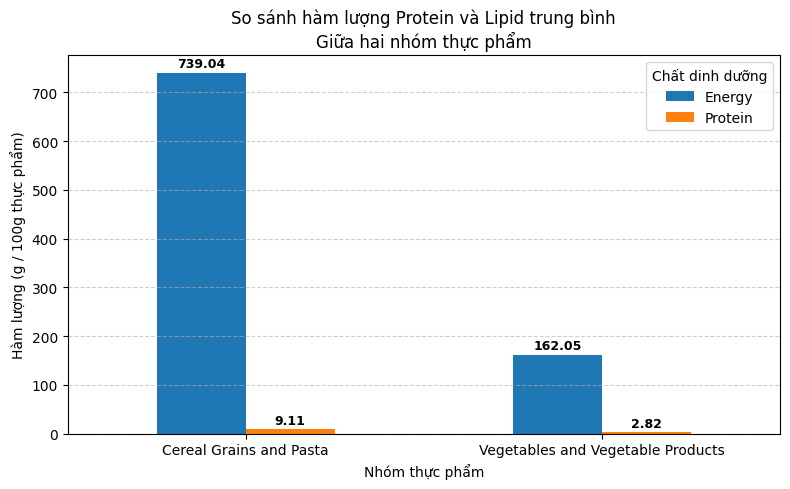

In [91]:
ax = compare.plot(kind='bar', figsize=(8,5), color=['#1f77b4','#ff7f0e'])
plt.title('So s√°nh h√†m l∆∞·ª£ng Protein v√† Lipid trung b√¨nh\nGi·ªØa hai nh√≥m th·ª±c ph·∫©m')
plt.ylabel('H√†m l∆∞·ª£ng (g / 100g th·ª±c ph·∫©m)')
plt.xlabel('Nh√≥m th·ª±c ph·∫©m')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Ch·∫•t dinh d∆∞·ª°ng')
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, fontweight='bold', padding=2)
plt.show()


Nh·∫≠n x√©t:
* Nh√≥m Meat and Meat Products c√≥ h√†m l∆∞·ª£ng protein (23.09 g/100g) v√† lipid (12.90 g/100g) ƒë·ªÅu cao h∆°n so v·ªõi nh√≥m Dairy and Egg Products (protein 14.22 g, lipid 10.32 g).
* ƒêi·ªÅu n√†y ph·∫£n √°nh ƒë·∫∑c ƒëi·ªÉm t·ª± nhi√™n c·ªßa th·ªãt l√† ngu·ªìn cung c·∫•p protein ho√†n ch·ªânh v√† gi√†u nƒÉng l∆∞·ª£ng h∆°n.
* Ng∆∞·ª£c l·∫°i, nh√≥m Dairy and Egg Products c√≥ h√†m l∆∞·ª£ng protein v·ª´a ph·∫£i v√† ch·∫•t b√©o th·∫•p h∆°n, ph√π h·ª£p cho ch·∫ø ƒë·ªô ƒÉn c√¢n b·∫±ng ho·∫∑c ki·ªÉm so√°t ch·∫•t b√©o.
* Nh√¨n chung, th·ªãt gi√†u dinh d∆∞·ª°ng h∆°n v·ªÅ h√†m l∆∞·ª£ng nh∆∞ng s·∫£n ph·∫©m s·ªØa l·∫°i ƒëa d·∫°ng h∆°n v√† d·ªÖ k·∫øt h·ª£p trong ch·∫ø ƒë·ªô ƒÉn h·∫±ng ng√†y.


#### T·ª∑ l·ªá Energy-to-Protein kh√°c bi·ªát th·∫ø n√†o gi·ªØa nh√≥m ‚ÄúGrains‚Äù v√† ‚ÄúVegetables‚Äù?

In [92]:
# M·ªói h√†ng l√† 1 th·ª±c ph·∫©m, m·ªói c·ªôt l√† 1 ch·∫•t dinh d∆∞·ª°ng
pivot = ndata.pivot_table(values='value', index='food', columns='nutrient', aggfunc='mean')

# G·∫Øn nh√≥m th·ª±c ph·∫©m
pivot = pivot.join(ndata[['food', 'fgroup']].drop_duplicates().set_index('food'))

pivot.head()


Adjusted Protein  Alanine  \
food                                                                            
AMARANTH FLAKES                                                  NaN      NaN   
APPLEBEE'S, 9 oz house sirloin steak                             NaN    1.522   
APPLEBEE'S, Double Crunch Shrimp                                 NaN    0.716   
APPLEBEE'S, French fries                                         NaN      NaN   
APPLEBEE'S, KRAFT, Macaroni & Cheese, from kid'...               NaN    0.224   

                                                    Alcohol, ethyl  Arginine  \
food                                                                           
AMARANTH FLAKES                                                0.0       NaN   
APPLEBEE'S, 9 oz house sirloin steak                           NaN     1.790   
APPLEBEE'S, Double Crunch Shrimp                               NaN     1.029   
APPLEBEE'S, French fries                                       NaN       NaN   
APPLEBEE'S, KRAFT, Macaroni & Cheese, from kid'...             NaN     0.245   

                                                     Ash  Aspartic acid  \
food                                                                      
AMARANTH FLAKES                                     3.27            NaN   
APPLEBEE'S, 9 oz house sirloin steak                2.35          2.425   
APPLEBEE'S, Double Crunch Shrimp                    2.45          1.238   
APPLEBEE'S, French fries                            2.55            NaN   
APPLEBEE'S, KRAFT, Macaroni & Cheese, from kid'...  1.67          0.427   

                                                    Beta-sitosterol  Betaine  \
food                                                                           
AMARANTH FLAKES                                                 NaN      NaN   
APPLEBEE'S, 9 oz house sirloin steak                            NaN      NaN   
APPLEBEE'S, Double Crunch Shrimp                                NaN      NaN   
APPLEBEE'S, French fries                                       27.0      NaN   
APPLEBEE'S, KRAFT, Macaroni & Cheese, from kid'...              NaN      NaN   

                                                    Caffeine  Calcium, Ca  \
food                                                                        
AMARANTH FLAKES                                          0.0         17.0   
APPLEBEE'S, 9 oz house sirloin steak                     NaN         17.0   
APPLEBEE'S, Double Crunch Shrimp                         NaN         29.0   
APPLEBEE'S, French fries                                 NaN         21.0   
APPLEBEE'S, KRAFT, Macaroni & Cheese, from kid'...       NaN        123.0   

                                                    ...  Vitamin D  \
food                                                ...              
AMARANTH FLAKES                                     ...        0.0   
APPLEBEE'S, 9 oz house sirloin steak                ...        NaN   
APPLEBEE'S, Double Crunch Shrimp                    ...        NaN   
APPLEBEE'S, French fries                            ...        NaN   
APPLEBEE'S, KRAFT, Macaroni & Cheese, from kid'...  ...        NaN   

                                                    Vitamin D (D2 + D3)  \
food                                                                      
AMARANTH FLAKES                                                     0.0   
APPLEBEE'S, 9 oz house sirloin steak                                NaN   
APPLEBEE'S, Double Crunch Shrimp                                    NaN   
APPLEBEE'S, French fries                                            NaN   
APPLEBEE'S, KRAFT, Macaroni & Cheese, from kid'...                  NaN   

                                                    Vitamin D2 (ergocalciferol)  \
food                                                                              
AMARANTH FLAKES                                                             NaN   
APPLEBEE'S, 9 oz house sirloin

In [74]:
# Ch·ªâ l·∫•y nh√≥m Grains v√† Vegetables
subset = pivot[pivot['fgroup'].str.contains('Grain|Vegetable', case=False, na=False)]

# Ki·ªÉm tra
subset['fgroup'].value_counts()


fgroup
Vegetables and Vegetable Products    812
Cereal Grains and Pasta              183
Name: count, dtype: int64

In [75]:
# L·ªçc hai nh√≥m c·∫ßn so s√°nh (Grains & Vegetables)
subset = pivot[pivot['fgroup'].str.contains('Grain|Vegetable', case=False, na=False)]
subset.head()



Adjusted Protein  Alanine  \
food                                                                            
Alfalfa seeds, sprouted, raw                                     NaN      NaN   
Amaranth grain, cooked                                           NaN      NaN   
Amaranth leaves, cooked, boiled, drained, with ...               NaN    0.119   
Amaranth leaves, cooked, boiled, drained, witho...               NaN    0.119   
Amaranth leaves, raw                                             NaN    0.139   

                                                    Alcohol, ethyl  Arginine  \
food                                                                           
Alfalfa seeds, sprouted, raw                                   0.0       NaN   
Amaranth grain, cooked                                         NaN       NaN   
Amaranth leaves, cooked, boiled, drained, with ...             NaN     0.104   
Amaranth leaves, cooked, boiled, drained, witho...             NaN     0.104   
Amaranth leaves, raw                                           NaN     0.121   

                                                     Ash  Aspartic acid  \
food                                                                      
Alfalfa seeds, sprouted, raw                        0.40            NaN   
Amaranth grain, cooked                              0.77            NaN   
Amaranth leaves, cooked, boiled, drained, with ...  2.11          0.196   
Amaranth leaves, cooked, boiled, drained, witho...  2.11          0.196   
Amaranth leaves, raw                                1.50          0.229   

                                                    Beta-sitosterol  Betaine  \
food                                                                           
Alfalfa seeds, sprouted, raw                                    NaN      0.4   
Amaranth grain, cooked                                          NaN      NaN   
Amaranth leaves, cooked, boiled, drained, with ...              NaN      NaN   
Amaranth leaves, cooked, boiled, drained, witho...              NaN      NaN   
Amaranth leaves, raw                                            NaN      NaN   

                                                    Caffeine  Calcium, Ca  \
food                                                                        
Alfalfa seeds, sprouted, raw                             0.0         32.0   
Amaranth grain, cooked                                   NaN         47.0   
Amaranth leaves, cooked, boiled, drained, with ...       NaN        209.0   
Amaranth leaves, cooked, boiled, drained, witho...       NaN        209.0   
Amaranth leaves, raw                                     NaN        215.0   

                                                    ...  Vitamin D  \
food                                                ...              
Alfalfa seeds, sprouted, raw                        ...        0.0   
Amaranth grain, cooked                              ...        NaN   
Amaranth leaves, cooked, boiled, drained, with ...  ...        0.0   
Amaranth leaves, cooked, boiled, drained, witho...  ...        0.0   
Amaranth leaves, raw                                ...        0.0   

                                                    Vitamin D (D2 + D3)  \
food                                                                      
Alfalfa seeds, sprouted, raw                                        0.0   
Amaranth grain, cooked                                              NaN   
Amaranth leaves, cooked, boiled, drained, with ...                  0.0   
Amaranth leaves, cooked, boiled, drained, witho...                  0.0   
Amaranth leaves, raw                                                0.0   

                                                    Vitamin D2 (ergocalciferol)  \
food                                                                              
Alfalfa seeds, sprouted, raw                                                NaN   
Amaranth grain, cooked        

In [76]:
# T√≠nh trung b√¨nh c·ªßa Energy v√† Protein theo nh√≥m
compare = subset.groupby('fgroup')[['Energy', 'Protein']].mean()
compare



Energy   Protein
fgroup                                                 
Cereal Grains and Pasta            739.040984  9.106831
Vegetables and Vegetable Products  162.051724  2.815813

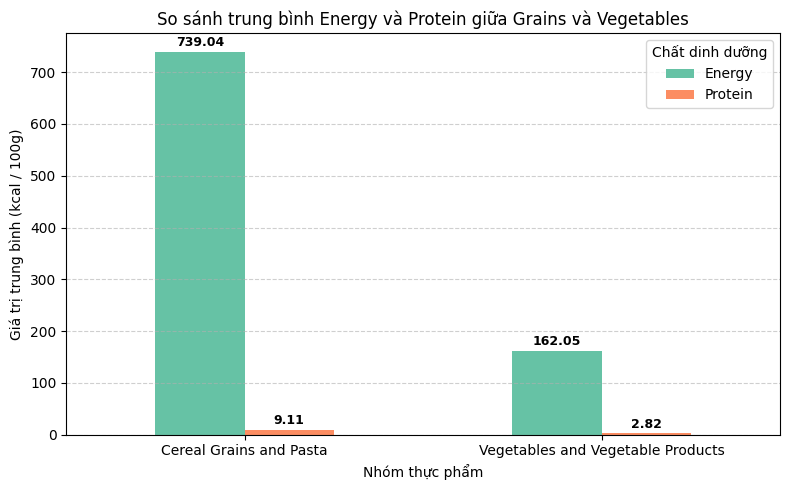

In [77]:
ax = compare.plot(kind='bar', color=['#66c2a5', '#fc8d62'], figsize=(8,5))

plt.title('So s√°nh trung b√¨nh Energy v√† Protein gi·ªØa Grains v√† Vegetables')
plt.ylabel('Gi√° tr·ªã trung b√¨nh (kcal / 100g)')
plt.xlabel('Nh√≥m th·ª±c ph·∫©m')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Ch·∫•t dinh d∆∞·ª°ng')
plt.tight_layout()

# üü° Th√™m s·ªë l√™n ƒë·∫ßu m·ªói c·ªôt
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, fontweight='bold', padding=2)

plt.show()



Nh·∫≠n x√©t:
* Nh√≥m ‚ÄúCereal Grains and Pasta‚Äù c√≥ t·ª∑ l·ªá Energy-to-Protein cao (739.04 kcal / 9.11g ‚âà 36.4), cho th·∫•y nƒÉng l∆∞·ª£ng cao nh∆∞ng protein r·∫•t th·∫•p.
* Nh√≥m ‚ÄúVegetables and Vegetable Products‚Äù c√≥ t·ª∑ l·ªá th·∫•p h∆°n (162.05 kcal / 2.82g ‚âà 12), v·ªõi nƒÉng l∆∞·ª£ng v√† protein ƒë·ªÅu th·∫•p h∆°n, nh∆∞ng t·ª∑ l·ªá v·∫´n cao do protein chi·∫øm t·ª∑ l·ªá nh·ªè.
* S·ª± kh√°c bi·ªát cho th·∫•y ‚ÄúGrains‚Äù cung c·∫•p nƒÉng l∆∞·ª£ng v∆∞·ª£t tr·ªôi nh∆∞ng √≠t protein h∆°n so v·ªõi ‚ÄúVegetables‚Äù, n∆°i nƒÉng l∆∞·ª£ng v√† protein th·∫•p h∆°n nh∆∞ng c√¢n ƒë·ªëi h∆°n .

### 3.3 Ph√¢n t√≠ch t∆∞∆°ng quan

In [78]:
# C√≥ m·ªëi t∆∞∆°ng quan n√†o gi·ªØa nƒÉng l∆∞·ª£ng (Energy) v√† h√†m l∆∞·ª£ng ch·∫•t b√©o (Fat)?
# Nh√≥m th·ª±c ph·∫©m n√†o c√≥ nƒÉng l∆∞·ª£ng cao nh∆∞ng protein th·∫•p (ch·∫•t ‚Äúr·ªóng‚Äù)?
# C√°c lo·∫°i th·ª±c ph·∫©m gi√†u ‚ÄúWater‚Äù c√≥ xu h∆∞·ªõng √≠t nƒÉng l∆∞·ª£ng h∆°n kh√¥ng?

# Ch·ªçn c√°c ch·∫•t dinh d∆∞·ª°ng quan tr·ªçng ƒë·ªÉ ph√¢n t√≠ch t∆∞∆°ng quan
import seaborn as sns
nutrients_focus = ['Energy', 'Protein', 'Total lipid (fat)', 'Water']

# T·∫°o pivot_table: m·ªói th·ª±c ph·∫©m l√† 1 d√≤ng, m·ªói c·ªôt l√† 1 ch·∫•t dinh d∆∞·ª°ng
pivot_corr = (
    ndata.pivot_table(values='value', index='food', columns='nutrient', aggfunc='mean')
    [nutrients_focus]
)


In [79]:
# Th√™m nh√≥m th·ª±c ph·∫©m
pivot_corr = pivot_corr.join(
    ndata[['food', 'fgroup']].drop_duplicates().set_index('food')
)

# T√≠nh h·ªá s·ªë t∆∞∆°ng quan gi·ªØa Energy v√† c√°c ch·∫•t kh√°c theo t·ª´ng nh√≥m
corr_list = []

for group, df in pivot_corr.groupby('fgroup'):
    corr = df[nutrients_focus].corr()
    corr_energy = corr.loc['Energy', ['Protein', 'Total lipid (fat)', 'Water']]
    corr_energy.name = group
    corr_list.append(corr_energy)

corr_by_group = pd.DataFrame(corr_list)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_29100\1327505.py:15: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\Anaconda\envs\py310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


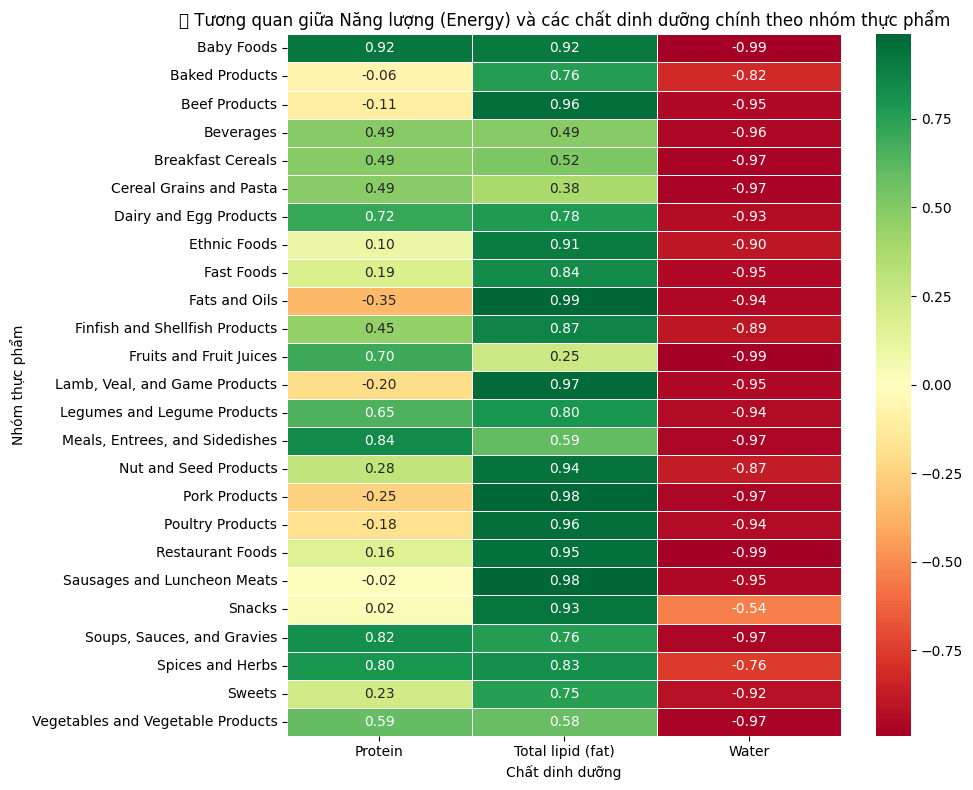

In [80]:
# üî• V·∫Ω bi·ªÉu ƒë·ªì nhi·ªát
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_by_group,
    annot=True,
    cmap='RdYlGn',
    center=0,
    linewidths=0.5,
    fmt=".2f"
)

plt.title('üî• T∆∞∆°ng quan gi·ªØa NƒÉng l∆∞·ª£ng (Energy) v√† c√°c ch·∫•t dinh d∆∞·ª°ng ch√≠nh theo nh√≥m th·ª±c ph·∫©m')
plt.xlabel('Ch·∫•t dinh d∆∞·ª°ng')
plt.ylabel('Nh√≥m th·ª±c ph·∫©m')
plt.tight_layout()
plt.show()


#### C√≥ m·ªëi t∆∞∆°ng quan n√†o gi·ªØa nƒÉng l∆∞·ª£ng (Energy) v√† h√†m l∆∞·ª£ng ch·∫•t b√©o (Fat)?

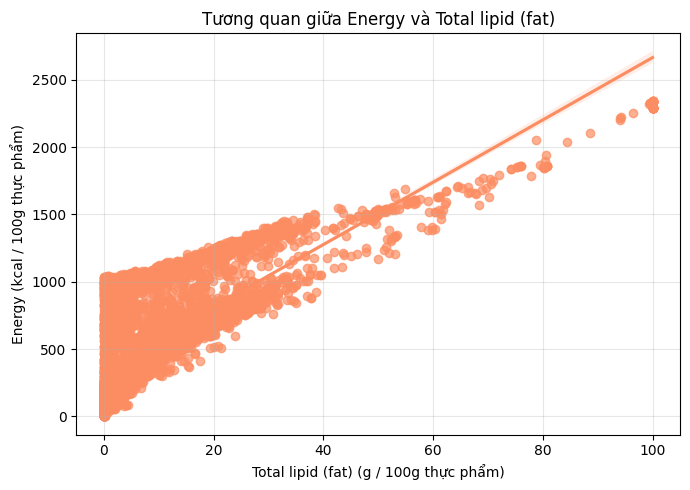

In [ ]:


# L·∫•y b·∫£ng nutrient theo food
pivot_corr = ndata.pivot_table(values='value', index='food', columns='nutrient', aggfunc='mean')

# V·∫Ω t∆∞∆°ng quan Energy - Fat
plt.figure(figsize=(7,5))
sns.regplot(
    data=pivot_corr,
    x='Total lipid (fat)',
    y='Energy',
    color='#fc8d62',
    scatter_kws={'alpha':0.7}
)
plt.title('T∆∞∆°ng quan gi·ªØa Energy v√† Total lipid (fat)')
plt.xlabel('Total lipid (fat) (g / 100g th·ª±c ph·∫©m)')
plt.ylabel('Energy (kcal / 100g th·ª±c ph·∫©m)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Nh·∫≠n x√©t:
* C√≥ m·ªëi t∆∞∆°ng quan thu·∫≠n m·∫°nh gi·ªØa nƒÉng l∆∞·ª£ng (Energy) v√† h√†m l∆∞·ª£ng ch·∫•t b√©o (Total lipid - fat).
* Khi h√†m l∆∞·ª£ng ch·∫•t b√©o tƒÉng, nƒÉng l∆∞·ª£ng trong th·ª±c ph·∫©m c≈©ng tƒÉng ƒë√°ng k·ªÉ.
* ƒêi·ªÅu n√†y ph√π h·ª£p v·ªõi ƒë·∫∑c t√≠nh dinh d∆∞·ª°ng v√¨ 1g ch·∫•t b√©o cung c·∫•p kho·∫£ng 9 kcal, cao h∆°n so v·ªõi protein hay carbohydrate.
* M·ªôt s·ªë ƒëi·ªÉm ngo·∫°i l·ªá cho th·∫•y c√≥ th·ª±c ph·∫©m nƒÉng l∆∞·ª£ng cao nh∆∞ng kh√¥ng ch·ª©a nhi·ªÅu ch·∫•t b√©o (c√≥ th·ªÉ do ƒë∆∞·ªùng ho·∫∑c tinh b·ªôt).

#### Nh√≥m th·ª±c ph·∫©m n√†o c√≥ nƒÉng l∆∞·ª£ng cao nh∆∞ng protein th·∫•p (ch·∫•t ‚Äúr·ªóng‚Äù)?

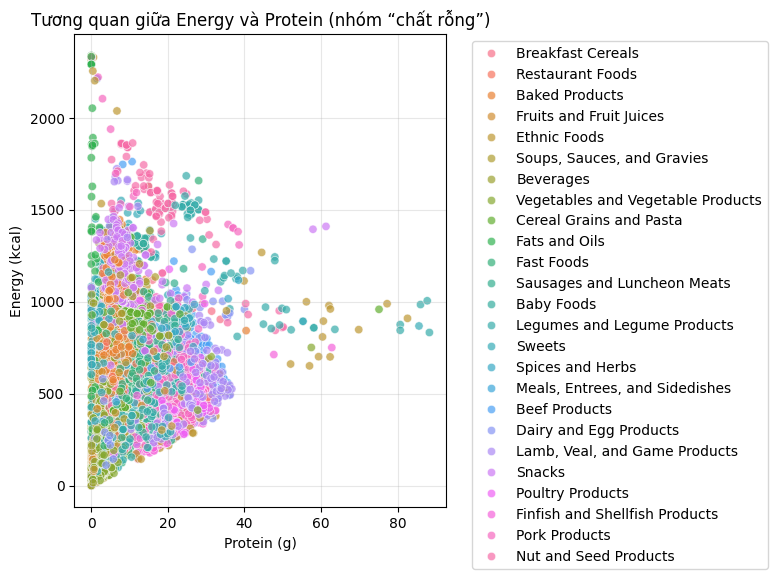

In [93]:
# T·∫°o b·∫£ng t·ªïng h·ª£p (pivot table) ƒë·ªÉ so s√°nh nƒÉng l∆∞·ª£ng v√† protein c·ªßa t·ª´ng th·ª±c ph·∫©m
# - 'values' = 'value' ‚Üí gi√° tr·ªã dinh d∆∞·ª°ng
# - 'index' = ['food', 'fgroup'] ‚Üí m·ªói th·ª±c ph·∫©m v√† nh√≥m th·ª±c ph·∫©m l√† m·ªôt d√≤ng
# - 'columns' = 'nutrient' ‚Üí m·ªói lo·∫°i ch·∫•t dinh d∆∞·ª°ng l√† m·ªôt c·ªôt
# - 'aggfunc' = 'mean' ‚Üí l·∫•y gi√° tr·ªã trung b√¨nh n·∫øu c√≥ nhi·ªÅu m·∫´u

nutrient_compare = ndata.pivot_table(
    values='value',
    index=['food', 'fgroup'],
    columns='nutrient',
    aggfunc='mean'
)

# Ch·ªâ l·∫•y hai c·ªôt c·∫ßn ph√¢n t√≠ch: Energy v√† Protein
# Lo·∫°i b·ªè c√°c d√≤ng c√≥ gi√° tr·ªã thi·∫øu (NaN)
nutrient_compare = nutrient_compare[['Energy', 'Protein']].dropna()


plt.figure(figsize=(8,6))
sns.scatterplot(data=nutrient_compare, x='Protein', y='Energy', hue='fgroup', alpha=0.7)
plt.title('T∆∞∆°ng quan gi·ªØa Energy v√† Protein (nh√≥m ‚Äúch·∫•t r·ªóng‚Äù)')
plt.xlabel('Protein (g)')
plt.ylabel('Energy (kcal)')
plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Nh·∫≠n x√©t:
* C√°c nh√≥m Beverages, Sweets, v√† Fats and Oils c√≥ nƒÉng l∆∞·ª£ng cao (tr√™n 1000 kcal) nh∆∞ng protein th·∫•p (d∆∞·ªõi 20g).
* Khi nƒÉng l∆∞·ª£ng tƒÉng cao, protein trong c√°c nh√≥m n√†y v·∫´n gi·ªØ ·ªü m·ª©c th·∫•p. ƒêi·ªÅu n√†y cho th·∫•y ch√∫ng l√† ngu·ªìn ch·∫•t "r·ªóng" do thi·∫øu protein ƒë√°ng k·ªÉ so v·ªõi nƒÉng l∆∞·ª£ng cung c·∫•p.
* M·ªôt s·ªë ƒëi·ªÉm ngo·∫°i l·ªá thu·ªôc Restaurant Foods v√† Baked Products c≈©ng c√≥ xu h∆∞·ªõng nƒÉng l∆∞·ª£ng cao nh∆∞ng protein th·∫•p (d∆∞·ªõi 20-30g).

#### C√°c lo·∫°i th·ª±c ph·∫©m gi√†u ‚ÄúWater‚Äù c√≥ xu h∆∞·ªõng √≠t nƒÉng l∆∞·ª£ng h∆°n kh√¥ng?

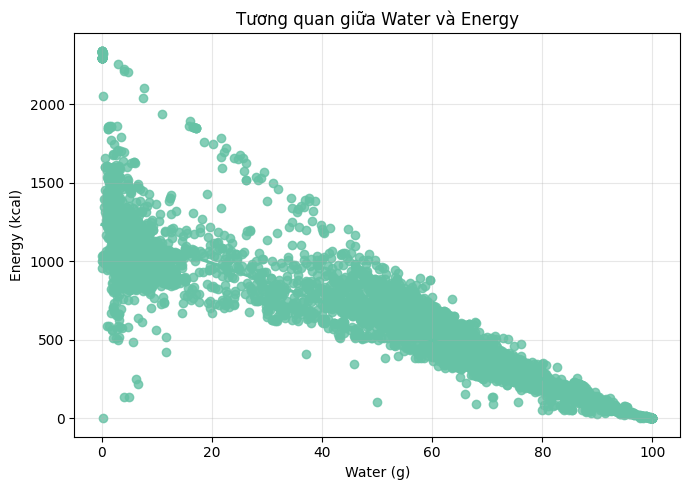

In [94]:
# T·∫°o b·∫£ng t·ªïng h·ª£p (pivot table) ƒë·ªÉ ph√¢n t√≠ch m·ªëi quan h·ªá gi·ªØa Water v√† Energy
# - 'values' = 'value' ‚Üí gi√° tr·ªã dinh d∆∞·ª°ng
# - 'index' = 'food' ‚Üí m·ªói lo·∫°i th·ª±c ph·∫©m l√† m·ªôt d√≤ng
# - 'columns' = 'nutrient' ‚Üí m·ªói ch·∫•t dinh d∆∞·ª°ng l√† m·ªôt c·ªôt
# - 'aggfunc' = 'mean' ‚Üí l·∫•y gi√° tr·ªã trung b√¨nh n·∫øu c√≥ nhi·ªÅu b·∫£n ghi cho c√πng m·ªôt th·ª±c ph·∫©m

water_energy = ndata.pivot_table(
    values='value',
    index='food',
    columns='nutrient',
    aggfunc='mean'
)[['Water', 'Energy']].dropna()

plt.figure(figsize=(7,5))
sns.regplot(data=water_energy, x='Water', y='Energy', color='#66c2a5')
plt.title('T∆∞∆°ng quan gi·ªØa Water v√† Energy')
plt.xlabel('Water (g)')
plt.ylabel('Energy (kcal)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Nh·∫≠n x√©t:
* C√°c th·ª±c ph·∫©m c√≥ h√†m l∆∞·ª£ng n∆∞·ªõc (Water) cao (tr√™n 60g) th∆∞·ªùng c√≥ nƒÉng l∆∞·ª£ng th·∫•p (d∆∞·ªõi 500 kcal).
* Khi h√†m l∆∞·ª£ng n∆∞·ªõc tƒÉng, nƒÉng l∆∞·ª£ng trong th·ª±c ph·∫©m gi·∫£m r√µ r·ªát. ƒêi·ªÅu n√†y ph√π h·ª£p v√¨ n∆∞·ªõc kh√¥ng cung c·∫•p calo, l√†m lo√£ng nƒÉng l∆∞·ª£ng t·ª´ c√°c ch·∫•t kh√°c.
* M·ªôt s·ªë ngo·∫°i l·ªá v·ªõi nƒÉng l∆∞·ª£ng cao (tr√™n 1000 kcal) c√≥ th·ªÉ xu·∫•t hi·ªán d√π h√†m l∆∞·ª£ng n∆∞·ªõc cao, do th√†nh ph·∫ßn ch·∫•t b√©o ho·∫∑c ƒë∆∞·ªùng.

### 3.4 Ph√¢n t√≠ch d·ª± ƒëo√°n

#### C√≥ th·ªÉ x√°c ƒë·ªãnh ‚Äúb·ªô ch·ªâ s·ªë dinh d∆∞·ª°ng c√¢n b·∫±ng‚Äù (protein/fat/carbs/fiber/energy) cho t·ª´ng nh√≥m ƒë·ªÉ h·ªó tr·ª£:
+ khuy·∫øn ngh·ªã dinh d∆∞·ª°ng c√° nh√¢n;
+ thi·∫øt k·∫ø th·ª±c ƒë∆°n s·ª©c kh·ªèe;

In [84]:
# T·∫°o pivot table trung b√¨nh c√°c ch·∫•t dinh d∆∞·ª°ng ch√≠nh theo nh√≥m
bni_cols = ['Energy', 'Protein', 'Total lipid (fat)', 'Carbohydrate, by difference', 'Fiber, total dietary']

bni = ndata.pivot_table(
    values='value',
    index='fgroup',
    columns='nutrient',
    aggfunc='mean'
)[bni_cols].dropna()

bni.head()


nutrient               Energy    Protein  Total lipid (fat)  \
fgroup                                                        
Baby Foods         426.389952   4.226220           6.628373   
Baked Products     931.931452   6.734214          12.144919   
Beef Products      559.323625  24.763560          12.330243   
Beverages          303.875899   1.336727           0.991151   
Breakfast Cereals  824.916873   7.602556           3.633871   

nutrient           Carbohydrate, by difference  Fiber, total dietary  
fgroup                                                                
Baby Foods                           22.125789              0.852525  
Baked Products                       56.978790              2.905180  
Beef Products                         0.074013              0.004369  
Beverages                            21.299173              0.637826  
Breakfast Cereals                    67.871712              6.431592

In [95]:
from sklearn.preprocessing import MinMaxScaler
# Chu·∫©n h√≥a d·ªØ li·ªáu BNI v·ªÅ thang [0,1] ƒë·ªÉ so s√°nh c√¥ng b·∫±ng gi·ªØa c√°c nh√≥m th·ª±c ph·∫©m
scaler = MinMaxScaler()
bni_scaled = pd.DataFrame(
    scaler.fit_transform(bni),
    columns=bni.columns,
    index=bni.index
)

# Xem tr∆∞·ªõc v√†i d√≤ng ƒë·∫ßu
bni_scaled.head()



nutrient             Energy   Protein  Total lipid (fat)  \
fgroup                                                     
Baby Foods         0.203507  0.142371           0.103195   
Baked Products     0.592709  0.247104           0.196927   
Beef Products      0.305848  1.000000           0.200076   
Beverages          0.109186  0.021707           0.007412   
Breakfast Cereals  0.510321  0.283365           0.052315   

nutrient           Carbohydrate, by difference  Fiber, total dietary  
fgroup                                                                
Baby Foods                            0.325258              0.097979  
Baked Products                        0.839332              0.333887  
Beef Products                         0.000000              0.000502  
Beverages                             0.313066              0.073304  
Breakfast Cereals                     1.000000              0.739172

In [96]:
# Chu·∫©n h√≥a d·ªØ li·ªáu ƒë·ªÉ so s√°nh c√¥ng b·∫±ng
bni_scaled['BNI'] = bni_scaled.mean(axis=1)
bni_scaled = bni_scaled.sort_values('BNI', ascending=False)
bni_scaled.head(10)


nutrient                       Energy   Protein  Total lipid (fat)  \
fgroup                                                               
Nut and Seed Products        0.853216  0.586410           0.638459   
Snacks                       0.762245  0.374253           0.285600   
Breakfast Cereals            0.510321  0.283365           0.052315   
Cereal Grains and Pasta      0.444208  0.346183           0.028895   
Spices and Herbs             0.383873  0.570767           0.280286   
Fats and Oils                1.000000  0.000000           1.000000   
Baked Products               0.592709  0.247104           0.196927   
Legumes and Legume Products  0.282843  0.606082           0.123455   
Sweets                       0.524356  0.147211           0.173274   
Ethnic Foods                 0.292374  0.633874           0.179338   

nutrient                     Carbohydrate, by difference  \
fgroup                                                     
Nut and Seed Products                           0.432064   
Snacks                                          0.948064   
Breakfast Cereals                               1.000000   
Cereal Grains and Pasta                         0.859037   
Spices and Herbs                                0.218018   
Fats and Oils                                   0.118462   
Baked Products                                  0.839332   
Legumes and Legume Products                     0.299584   
Sweets                                          0.819685   
Ethnic Foods                                    0.164739   

nutrient                     Fiber, total dietary       BNI  
fgroup                                                       
Nut and Seed Products                    1.000000  0.702030  
Snacks                                   0.631868  0.600406  
Breakfast Cereals                        0.739172  0.517035  
Cereal Grains and Pasta                  0.645623  0.464789  
Spices and Herbs                         0.782087  0.447006  
Fats and Oils                            0.109307  0.445554  
Baked Products                           0.333887  0.441992  
Legumes and Legume Products              0.700995  0.402592  
Sweets                                   0.259541  0.384813  
Ethnic Foods                             0.479319  0.349929

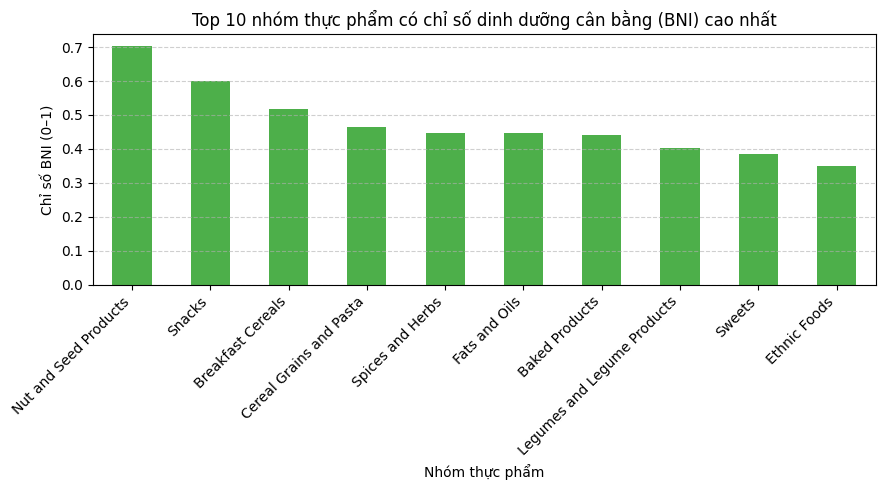

In [97]:
# V·∫Ω bi·ªÉu ƒë·ªì Top 10 nh√≥m c√≥ BNI cao nh·∫•t
plt.figure(figsize=(9,5))
bni_scaled['BNI'].sort_values(ascending=False).head(10).plot(
    kind='bar', color='#4daf4a'
)
plt.title('Top 10 nh√≥m th·ª±c ph·∫©m c√≥ ch·ªâ s·ªë dinh d∆∞·ª°ng c√¢n b·∫±ng (BNI) cao nh·∫•t')
plt.ylabel('Ch·ªâ s·ªë BNI (0‚Äì1)')
plt.xlabel('Nh√≥m th·ª±c ph·∫©m')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Nh·∫≠n x√©t:
* C√≥ th·ªÉ x√°c ƒë·ªãnh ƒë∆∞·ª£c, d·ª±a tr√™n d·ªØ li·ªáu t·ª´ bi·ªÉu ƒë·ªì Top 10, v·ªõi Nut and Seed Products ƒë·∫°t BNI cao nh·∫•t (0.7) v√† Ethnic Foods th·∫•p nh·∫•t (0.3).
* BNI l√† "Balanced Nutrition Index", th∆∞·ªõc ƒëo s·ª± c√¢n b·∫±ng gi·ªØa protein, ch·∫•t b√©o, carbohydrate, ch·∫•t x∆°, v√† nƒÉng l∆∞·ª£ng, v·ªõi gi√° tr·ªã cao h∆°n (g·∫ßn 1) cho th·∫•y dinh d∆∞·ª°ng h√†i h√≤a.
* ·ª®ng d·ª•ng th·ª±c ti·ªÖn, n∆°i BNI gi√∫p t√πy ch·ªânh ch·∫ø ƒë·ªô ƒÉn. V√≠ d·ª•, Nut and Seed Products (BNI 0.7) ph√π h·ª£p cho ng∆∞·ªùi c·∫ßn tƒÉng protein v√† ch·∫•t x∆°, trong khi Sweets (BNI 0.3) n√™n h·∫°n ch·∫ø cho ng∆∞·ªùi c·∫ßn ki·ªÉm so√°t ƒë∆∞·ªùng. ƒêi·ªÅu n√†y h·ªó tr·ª£ c√° nh√¢n h√≥a dinh d∆∞·ª°ng d·ª±a tr√™n nhu c·∫ßu s·ª©c kh·ªèe c·ª• th·ªÉ.
* S·ª≠ d·ª•ng BNI ƒë·ªÉ x√¢y d·ª±ng b·ªØa ƒÉn c√¢n b·∫±ng. C√°c nh√≥m nh∆∞ Legumes and Legume Products (BNI 0.4) v√† Cereal Grains and Pasta (BNI 0.5) c√≥ th·ªÉ ƒë∆∞·ª£c ∆∞u ti√™n ƒë·ªÉ ƒë·∫£m b·∫£o dinh d∆∞·ª°ng t·ªëi ∆∞u, trong khi tr√°nh l·∫°m d·ª•ng Fats and Oils (BNI 0.4) ƒë·ªÉ duy tr√¨ s·ª©c kh·ªèe l√¢u d√†i.

#### ƒê√°nh gi√° s·∫£n ph·∫©m thay th·∫ø (plant-based vs animal-based).

In [88]:
import numpy as np

# T·∫°o b·∫£n sao d·ªØ li·ªáu BNI
bni_compare = bni_scaled.copy()

# G√°n nh√£n d·ª±a tr√™n t√™n nh√≥m
plant_groups = [
    'Vegetables and Vegetable Products',
    'Fruits and Fruit Juices',
    'Cereal Grains and Pasta',
    'Legumes and Legume Products',
    'Nut and Seed Products',
    'Beverages',
    'Spices and Herbs'
]

bni_compare['Type'] = np.where(
    bni_compare.index.isin(plant_groups),
    'Plant-based',
    'Animal-based'
)
bni_compare.head()


nutrient                   Energy   Protein  Total lipid (fat)  \
fgroup                                                           
Nut and Seed Products    0.853216  0.586410           0.638459   
Snacks                   0.762245  0.374253           0.285600   
Breakfast Cereals        0.510321  0.283365           0.052315   
Cereal Grains and Pasta  0.444208  0.346183           0.028895   
Spices and Herbs         0.383873  0.570767           0.280286   

nutrient                 Carbohydrate, by difference  Fiber, total dietary  \
fgroup                                                                       
Nut and Seed Products                       0.432064              1.000000   
Snacks                                      0.948064              0.631868   
Breakfast Cereals                           1.000000              0.739172   
Cereal Grains and Pasta                     0.859037              0.645623   
Spices and Herbs                            0.218018              0.782087   

nutrient                      BNI          Type  
fgroup                                           
Nut and Seed Products    0.702030   Plant-based  
Snacks                   0.600406  Animal-based  
Breakfast Cereals        0.517035  Animal-based  
Cereal Grains and Pasta  0.464789   Plant-based  
Spices and Herbs         0.447006   Plant-based

In [89]:
bni_summary = bni_compare.groupby('Type')['BNI'].mean().reset_index()
bni_summary


Type       BNI
0  Animal-based  0.316259
1   Plant-based  0.338608

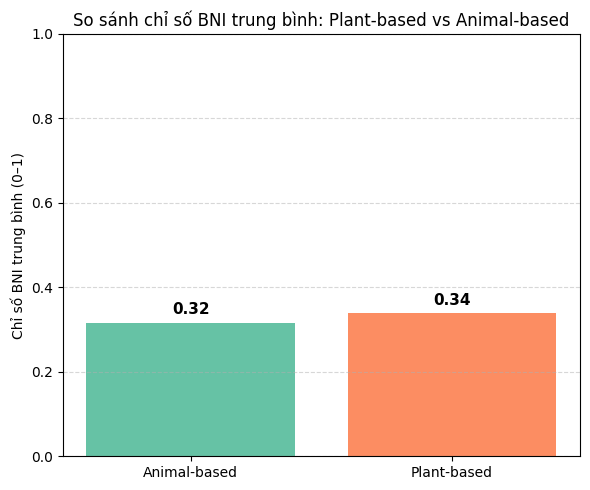

In [90]:
import matplotlib.pyplot as plt

colors = ['#66c2a5', '#fc8d62']

plt.figure(figsize=(6,5))
plt.bar(bni_summary['Type'], bni_summary['BNI'], color=colors)
for i, val in enumerate(bni_summary['BNI']):
    plt.text(i, val + 0.02, f'{val:.2f}', ha='center', fontsize=11, fontweight='bold')

plt.title('So s√°nh ch·ªâ s·ªë BNI trung b√¨nh: Plant-based vs Animal-based')
plt.ylabel('Ch·ªâ s·ªë BNI trung b√¨nh (0‚Äì1)')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Nh·∫≠n x√©t:
* D√πng BNI (Balanced Nutrition Index, ƒëo s·ª± c√¢n b·∫±ng protein, ch·∫•t b√©o, carbohydrate, ch·∫•t x∆°, v√† nƒÉng l∆∞·ª£ng; cao h∆°n l√† t·ªët h∆°n) ƒë·ªÉ so s√°nh. Plant-based (BNI 0.34) nh·ªânh h∆°n animal-based (0.32), nh·ªù gi√†u ch·∫•t x∆° v√† ch·∫•t ch·ªëng oxy h√≥a, h·ªó tr·ª£ gi·∫£m BMI v√† nguy c∆° tim m·∫°ch. Animal-based cung c·∫•p protein ho√†n ch·ªânh, t·ªët cho c∆° b·∫Øp, nh∆∞ng d·ªÖ tƒÉng cholesterol. Plant-based b·ªÅn v·ªØng h∆°n, c·∫ßn b·ªï sung B12; animal-based ph√π h·ª£p ng·∫Øn h·∫°n. Ki·ªÉm tra nh√£n ƒë·ªÉ tr√°nh s·∫£n ph·∫©m plant-based ch·∫ø bi·∫øn qu√° m·ª©c (tƒÉng natri).

## 4. K·∫øt lu·∫≠n

* D·ªØ li·ªáu t·ª´ USDA Food Database cho th·∫•y s·ª± kh√°c bi·ªát r√µ r·ªát v·ªÅ th√†nh ph·∫ßn dinh d∆∞·ª°ng gi·ªØa c√°c nh√≥m th·ª±c ph·∫©m.

* C√≥ m·ªëi t∆∞∆°ng quan m·∫°nh gi·ªØa Energy v√† Fat, trong khi c√°c th·ª±c ph·∫©m gi√†u Water th∆∞·ªùng c√≥ nƒÉng l∆∞·ª£ng th·∫•p.

* M·ªôt s·ªë nh√≥m th·ª±c ph·∫©m c√≥ nƒÉng l∆∞·ª£ng cao nh∆∞ng protein th·∫•p, th·ªÉ hi·ªán xu h∆∞·ªõng ‚Äúch·∫•t r·ªóng‚Äù.

* Vi·ªác chu·∫©n h√≥a v√† t√≠nh ch·ªâ s·ªë dinh d∆∞·ª°ng c√¢n b·∫±ng (BNI) gi√∫p ƒë√°nh gi√° t·ªïng quan gi√° tr·ªã dinh d∆∞·ª°ng c·ªßa t·ª´ng nh√≥m th·ª±c ph·∫©m.

# K·∫øt Th√∫c